`Business process`: selling products to customers 




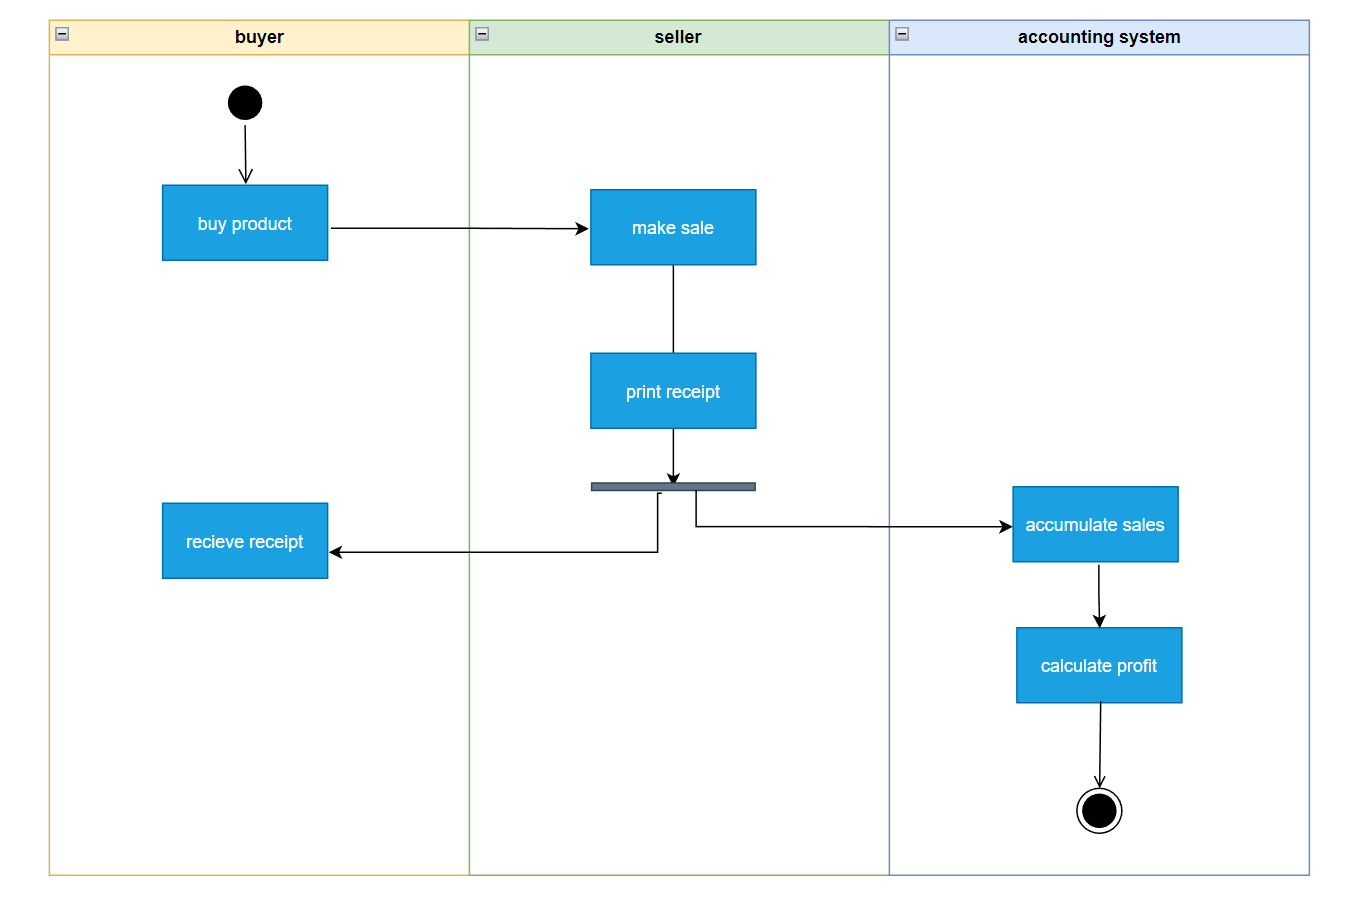


In [1]:
import pandas as pd

## 1

In [2]:
df_1 = pd.read_csv("../Datasets/processed/1_re.csv")

In [3]:
df_1.head(2).T

,0,1
Row ID,1,2
Order ID,CA-2016-152156,CA-2016-152156
Order Date,2016-11-08,2016-11-08
Ship Date,2016-11-11,2016-11-11
Ship Mode,Second Class,Second Class
Customer ID,CG-12520,CG-12520
Customer Name,Claire Gute,Claire Gute
Segment,Consumer,Consumer
Country,United States,United States
City,Henderson,Henderson


## 1.2 DB data model

`relations`:
- orders (order_id, order date, ship date, ship mode, customer_id) 
- order details (order_detail_id, order_id,  product_id, sales, quantity, discount, profit)	
- product (product_id, product_name, category, sub-category)
- location (location_id, Country, City, State, Postal Code, Region)
- customer (customer_id, customer_name, segment)


`ER data model:`

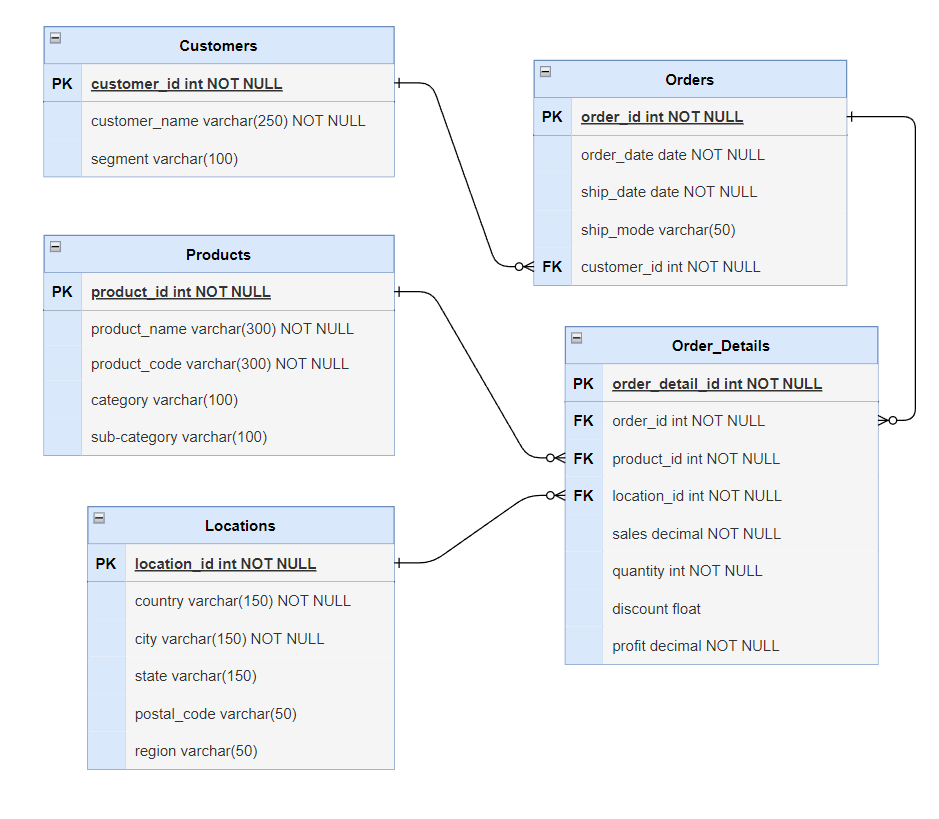

In [4]:
df_1_db = df_1.copy()

In [5]:
df_1_db.head(2).T

,0,1
Row ID,1,2
Order ID,CA-2016-152156,CA-2016-152156
Order Date,2016-11-08,2016-11-08
Ship Date,2016-11-11,2016-11-11
Ship Mode,Second Class,Second Class
Customer ID,CG-12520,CG-12520
Customer Name,Claire Gute,Claire Gute
Segment,Consumer,Consumer
Country,United States,United States
City,Henderson,Henderson


#### customers table

In [6]:
Customers = df_1_db[["Customer ID", "Customer Name", "Segment"]]
Customers = Customers[~Customers.duplicated()].reset_index(drop=True)
Customers 

,Customer ID,Customer Name,Segment
0,CG-12520,Claire Gute,Consumer
1,DV-13045,Darrin Van Huff,Corporate
2,SO-20335,Sean O'Donnell,Consumer
3,BH-11710,Brosina Hoffman,Consumer
4,AA-10480,Andrew Allen,Consumer
...,...,...,...
788,CJ-11875,Carl Jackson,Corporate
789,RS-19870,Roy Skaria,Home Office
790,SC-20845,Sung Chung,Consumer
791,RE-19405,Ricardo Emerson,Consumer


In [7]:
Customers = Customers.rename(columns={"Customer ID": "customer_id"})
df_1_db = df_1_db.rename(columns={"Customer ID": "customer_id"})

In [8]:
print("# columns before normalization: {}".format(len(df_1_db.columns)))
Customers = Customers.rename(columns={"Customer Name": "customer_name", "Segment": "segment"})
df_1_db = df_1_db.drop(columns=["Customer Name", "Segment"])
print("# columns before normalization: {}".format(len(df_1_db.columns)))

# columns before normalization: 21
# columns before normalization: 19


In [9]:
len(df_1_db.columns)

19

#### orders table

In [10]:
Orders = df_1_db[["Order ID", "Order Date", "Ship Date", "Ship Mode", "customer_id"]]
Orders = Orders[~Orders.duplicated()].reset_index(drop=True)
Orders 

,Order ID,Order Date,Ship Date,Ship Mode,customer_id
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520
1,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710
4,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480
...,...,...,...,...,...
5004,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410
5005,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885
5006,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400
5007,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060


In [11]:
Orders = Orders.rename(columns={"Order ID": "order_id"})
df_1_db = df_1_db.rename(columns={"Order ID": "order_id"})

In [12]:
print("# columns before normalization: {}".format(len(df_1_db.columns)))
Orders = Orders.rename(columns={"Order Date": "order_date", 
                                      "Ship Date": "ship_date",
                                      "Ship Mode": "ship_mode"})
df_1_db = df_1_db.drop(columns=["Order Date", "Ship Date", "Ship Mode"])
print("# columns before normalization: {}".format(len(df_1_db.columns)))

# columns before normalization: 19
# columns before normalization: 16


#### products table

In [13]:
Products = df_1_db[["Product ID", "Product Name", "Category", "Sub-Category"]]
Products = Products.rename(columns={"Product ID": "Product Code"})
Products = Products[~Products.duplicated()].reset_index(drop=True)
# Products["Product ID2"] = Products["Product ID"] + (Products.index % 10).astype('str').to_numpy()
Products["Product ID"] = Products.index

# ADDITIONAL: product code
Products 

,Product Code,Product Name,Category,Sub-Category,Product ID
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases,0
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,1
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,2
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,3
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,4
...,...,...,...,...,...
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones,1889
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines,1890
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances,1891
1892,TEC-PH-10002645,LG G2,Technology,Phones,1892


In [14]:
# NOTE: run once only
df_1_db = df_1_db.rename(columns={"Product ID": "Product Code"})

In [15]:
df_1_db["product_id"] = None
for loc in Products.iterrows():
    loc = loc[1].to_list()
    product_code, product_name, category, sub_category = loc[0], loc[1], loc[2], loc[3] 
    product_id = loc[4]
    
    df_1_db.loc[(df_1_db["Product Code"]==product_code) & 
             (df_1_db["Product Name"]==product_name) & 
             (df_1_db["Category"]==category) & 
             (df_1_db["Sub-Category"]==sub_category), 'product_id'] = product_id
    

In [16]:
Products = Products.rename(columns={"Product ID": "product_id"})
# df_1_db = df_1_db.rename(columns={"Product ID": "product_id"})  # no need to run this

In [17]:
df_1_db.columns

Index(['Row ID', 'order_id', 'customer_id', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product Code', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'product_id'],
      dtype='object')

In [18]:
print("# columns before normalization: {}".format(len(df_1_db.columns)))
Products = Products.rename(columns={"Product Code": "product_code", 
                                      "Product Name": "product_name",
                                      "Category": "category",
                                      "Sub-Category": "sub_category"})
df_1_db = df_1_db.drop(columns=["Product Code", "Product Name",
                                "Category", "Sub-Category"])
print("# columns before normalization: {}".format(len(df_1_db.columns)))

# columns before normalization: 17
# columns before normalization: 13


In [19]:
Products

,product_code,product_name,category,sub_category,product_id
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases,0
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,1
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,2
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,3
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,4
...,...,...,...,...,...
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones,1889
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines,1890
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances,1891
1892,TEC-PH-10002645,LG G2,Technology,Phones,1892


#### locations table

In [20]:
Locations = df_1_db[['Country', 'City', 'State', 'Postal Code', 'Region']]
Locations = Locations[~Locations.duplicated()].reset_index(drop=True)
Locations['location_id'] = Locations.index
Locations

,Country,City,State,Postal Code,Region,location_id
0,United States,Henderson,Kentucky,42420,South,0
1,United States,Los Angeles,California,90036,West,1
2,United States,Fort Lauderdale,Florida,33311,South,2
3,United States,Los Angeles,California,90032,West,3
4,United States,Concord,North Carolina,28027,South,4
...,...,...,...,...,...,...
627,United States,Springdale,Arkansas,72762,South,627
628,United States,Lodi,California,95240,West,628
629,United States,La Porte,Texas,77571,Central,629
630,United States,Mason,Ohio,45040,East,630


In [21]:
df_1_db["location_id"] = None 
for loc in Locations.iterrows():
    loc = loc[1].to_list()
    country, city, state, postal_code, region = loc[0], loc[1], loc[2], loc[3], loc[4]
    row_id = loc[5]
    
    df_1_db.loc[(df_1_db["Country"]==country) & (df_1_db["City"]==city) & 
                   (df_1_db["State"]==state) & (df_1_db["Postal Code"]==postal_code) & 
                   (df_1_db["Region"]==region) , 'location_id'] = row_id
    

In [22]:
# Locations = Locations.rename(columns={"Location ID": "location_id"})  # no need to run this
# df_1_db = df_1_db.rename(columns={"Location ID": "location_id"})  # no need to run this

In [23]:
print("# columns before normalization: {}".format(len(df_1_db.columns)))
Locations = Locations.rename(columns={"Country": "country", 
                                      "City": "city",
                                      "State": "state",
                                      "Postal Code": "postal_code",
                                      "Region": "region"})
df_1_db = df_1_db.drop(columns=["Country", "City", "State", 
                                "Postal Code", "Region"])
print("# columns before normalization: {}".format(len(df_1_db.columns)))

# columns before normalization: 14
# columns before normalization: 9


In [24]:
Locations

,country,city,state,postal_code,region,location_id
0,United States,Henderson,Kentucky,42420,South,0
1,United States,Los Angeles,California,90036,West,1
2,United States,Fort Lauderdale,Florida,33311,South,2
3,United States,Los Angeles,California,90032,West,3
4,United States,Concord,North Carolina,28027,South,4
...,...,...,...,...,...,...
627,United States,Springdale,Arkansas,72762,South,627
628,United States,Lodi,California,95240,West,628
629,United States,La Porte,Texas,77571,Central,629
630,United States,Mason,Ohio,45040,East,630


#### order details

In [25]:
Order_Details = df_1_db.copy()

In [26]:
Order_Details = Order_Details.rename(columns={"Row ID": "order_detail_id",
                                              "Quantity": "quantity",
                                              "Sales": "sales",
                                              "Discount": "discount",
                                              "Profit": "profit"})

cols = ["order_detail_id", "order_id", "product_id", 
        "location_id", "sales", "quantity", "discount", "profit"]
Order_Details = Order_Details[cols]
Order_Details

,order_detail_id,order_id,product_id,location_id,sales,quantity,discount,profit
0,1,CA-2016-152156,0,0,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,1,0,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2,1,14.6200,2,0.00,6.8714
3,4,US-2015-108966,3,2,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,4,2,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9981,9990,CA-2014-110422,1182,123,25.2480,3,0.20,4.1028
9982,9991,CA-2017-121258,1793,146,91.9600,2,0.00,15.6332
9983,9992,CA-2017-121258,298,146,258.5760,2,0.20,19.3932
9984,9993,CA-2017-121258,964,146,29.6000,4,0.00,13.3200


In [27]:


Order_Details

,order_detail_id,order_id,product_id,location_id,sales,quantity,discount,profit
0,1,CA-2016-152156,0,0,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,1,0,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2,1,14.6200,2,0.00,6.8714
3,4,US-2015-108966,3,2,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,4,2,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9981,9990,CA-2014-110422,1182,123,25.2480,3,0.20,4.1028
9982,9991,CA-2017-121258,1793,146,91.9600,2,0.00,15.6332
9983,9992,CA-2017-121258,298,146,258.5760,2,0.20,19.3932
9984,9993,CA-2017-121258,964,146,29.6000,4,0.00,13.3200


## 1.1 DW data model (NOT NEEDED)

`facts`:
- order_id
- customer_id
- location_id
- product_id
- sales
- quantity
- discount 
- profit

`dimensions`: 
- order (ID, order date, ship date, ship mode)
- customer (ID, customer name, segment)
- location (ID, country, city, state, postal code, region)
- product (ID, category, sub-category, product name)

`ER data model`
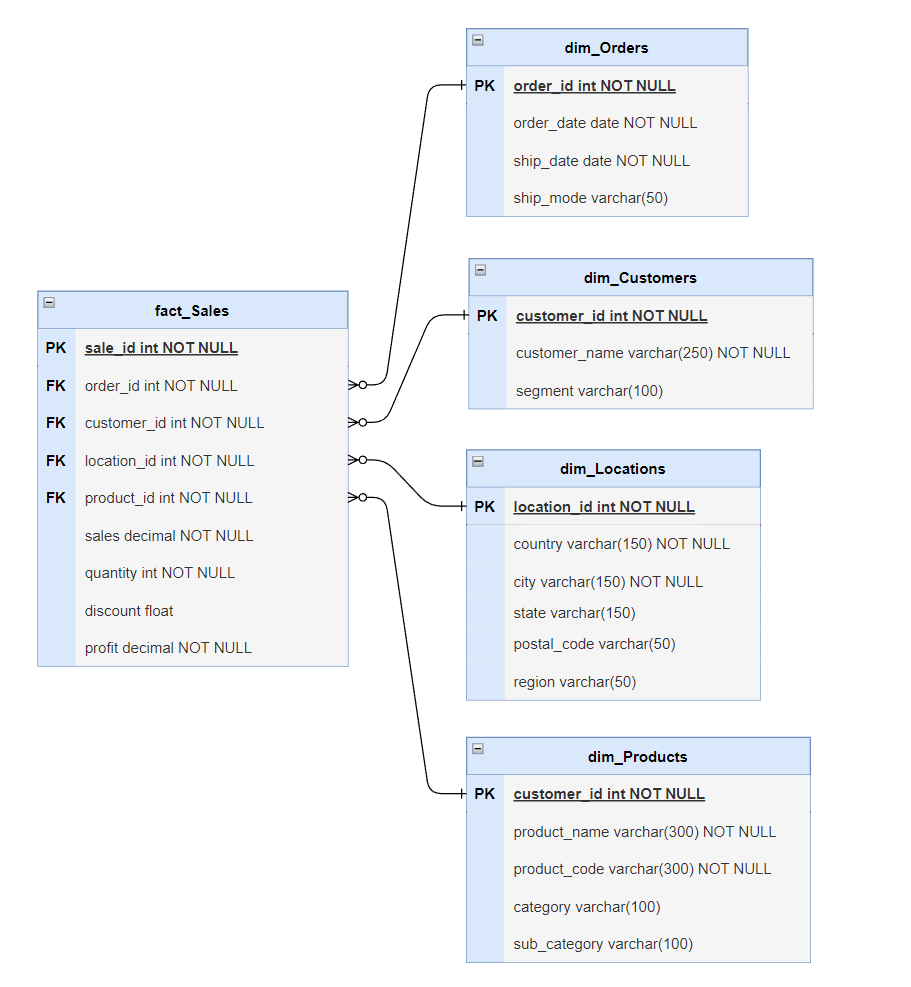

In [28]:
df_1_dw = df_1.copy()

#### dim_customers

In [29]:
dim_customers = df_1_dw[["Customer ID", "Customer Name", "Segment"]]
dim_customers = dim_customers[~dim_customers.duplicated()].reset_index(drop=True)
dim_customers 

,Customer ID,Customer Name,Segment
0,CG-12520,Claire Gute,Consumer
1,DV-13045,Darrin Van Huff,Corporate
2,SO-20335,Sean O'Donnell,Consumer
3,BH-11710,Brosina Hoffman,Consumer
4,AA-10480,Andrew Allen,Consumer
...,...,...,...
788,CJ-11875,Carl Jackson,Corporate
789,RS-19870,Roy Skaria,Home Office
790,SC-20845,Sung Chung,Consumer
791,RE-19405,Ricardo Emerson,Consumer


In [30]:
dim_customers = dim_customers.rename(columns={"Customer ID": "customer_id", 
                                              "Customer Name": "customer_name", "Segment": "segment"})


In [31]:
dim_customers

,customer_id,customer_name,segment
0,CG-12520,Claire Gute,Consumer
1,DV-13045,Darrin Van Huff,Corporate
2,SO-20335,Sean O'Donnell,Consumer
3,BH-11710,Brosina Hoffman,Consumer
4,AA-10480,Andrew Allen,Consumer
...,...,...,...
788,CJ-11875,Carl Jackson,Corporate
789,RS-19870,Roy Skaria,Home Office
790,SC-20845,Sung Chung,Consumer
791,RE-19405,Ricardo Emerson,Consumer


#### dim_orders

In [32]:
# Orders = df_1_db[["Order ID", "Order Date", "Ship Date", "Ship Mode", "customer_id"]]
# Orders = Orders[~Orders.duplicated()].reset_index(drop=True)
# Orders 

In [33]:
# Orders = df_1_db[["Order ID", "Order Date", "Ship Date", "Ship Mode", "customer_id"]]
# Orders = Orders[~Orders.duplicated()].reset_index(drop=True)

# Orders = Orders.rename(columns={"Order ID": "order_id"})
# df_1_db = df_1_db.rename(columns={"Order ID": "order_id"})

# print("# columns before normalization: {}".format(len(df_1_db.columns)))
# Orders = Orders.rename(columns={"Order Date": "order_date", 
#                                       "Ship Date": "ship_date",
#                                       "Ship Mode": "ship_mode"})
# df_1_db = df_1_db.drop(columns=["Order Date", "Ship Date", "Ship Mode"])
# print("# columns before normalization: {}".format(len(df_1_db.columns)))

In [34]:
dim_orders = df_1_dw[["Order ID", "Order Date", "Ship Date", "Ship Mode"]]
dim_orders = dim_orders[~dim_orders.duplicated()].reset_index(drop=True)
dim_orders 

,Order ID,Order Date,Ship Date,Ship Mode
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class
1,CA-2016-138688,2016-06-12,2016-06-16,Second Class
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class
4,CA-2017-114412,2017-04-15,2017-04-20,Standard Class
...,...,...,...,...
5004,CA-2016-125794,2016-09-29,2016-10-03,Standard Class
5005,CA-2017-163629,2017-11-17,2017-11-21,Standard Class
5006,CA-2014-110422,2014-01-21,2014-01-23,Second Class
5007,CA-2017-121258,2017-02-26,2017-03-03,Standard Class


In [35]:
dim_orders = dim_orders.rename(columns={
                                      "Order ID": "order_id",
                                      "Order Date": "order_date", 
                                      "Ship Date": "ship_date",
                                      "Ship Mode": "ship_mode"})

In [36]:
dim_orders

,order_id,order_date,ship_date,ship_mode
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class
1,CA-2016-138688,2016-06-12,2016-06-16,Second Class
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class
4,CA-2017-114412,2017-04-15,2017-04-20,Standard Class
...,...,...,...,...
5004,CA-2016-125794,2016-09-29,2016-10-03,Standard Class
5005,CA-2017-163629,2017-11-17,2017-11-21,Standard Class
5006,CA-2014-110422,2014-01-21,2014-01-23,Second Class
5007,CA-2017-121258,2017-02-26,2017-03-03,Standard Class


#### dim_products

In [37]:
dim_products = df_1_dw[["Product ID", "Product Name", "Category", "Sub-Category"]]
dim_products = dim_products.rename(columns={"Product ID": "Product Code"})
dim_products = dim_products[~dim_products.duplicated()].reset_index(drop=True)
# dim_products["Product ID2"] = dim_products["Product ID"] + (dim_products.index % 10).astype('str').to_numpy()
dim_products["product_id"] = dim_products.index

# ADDITIONAL: product code
dim_products 

,Product Code,Product Name,Category,Sub-Category,product_id
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases,0
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,1
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,2
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,3
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,4
...,...,...,...,...,...
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones,1889
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines,1890
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances,1891
1892,TEC-PH-10002645,LG G2,Technology,Phones,1892


In [38]:
# NOTE: run once only
df_1_dw = df_1_dw.rename(columns={"Product ID": "Product Code"})

In [39]:
dim_products = dim_products.rename(columns={"Product ID": "product_id"})
# df_1_dw = df_1_dw.rename(columns={"Product ID": "product_id"})  # no need to run this

In [40]:
dim_products = dim_products.rename(columns={"Product Code": "product_code", 
                                      "Product Name": "product_name",
                                      "Category": "category",
                                      "Sub-Category": "sub_category"})

In [41]:
dim_products

,product_code,product_name,category,sub_category,product_id
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases,0
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,1
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,2
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,3
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,4
...,...,...,...,...,...
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones,1889
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines,1890
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances,1891
1892,TEC-PH-10002645,LG G2,Technology,Phones,1892


#### dim_locations

In [42]:
dim_locations = df_1_dw[['Country', 'City', 'State', 'Postal Code', 'Region']]
dim_locations = dim_locations[~dim_locations.duplicated()].reset_index(drop=True)
dim_locations['location_id'] = dim_locations.index
dim_locations

,Country,City,State,Postal Code,Region,location_id
0,United States,Henderson,Kentucky,42420,South,0
1,United States,Los Angeles,California,90036,West,1
2,United States,Fort Lauderdale,Florida,33311,South,2
3,United States,Los Angeles,California,90032,West,3
4,United States,Concord,North Carolina,28027,South,4
...,...,...,...,...,...,...
627,United States,Springdale,Arkansas,72762,South,627
628,United States,Lodi,California,95240,West,628
629,United States,La Porte,Texas,77571,Central,629
630,United States,Mason,Ohio,45040,East,630


In [43]:
# dim_locations = dim_locations.rename(columns={"Location ID": "location_id"})  # no need to run this
# df_1_dw = df_1_dw.rename(columns={"Location ID": "location_id"})  # no need to run this

In [44]:
dim_locations = dim_locations.rename(columns={"Country": "country", 
                                      "City": "city",
                                      "State": "state",
                                      "Postal Code": "postal_code",
                                      "Region": "region"})

In [45]:
dim_locations

,country,city,state,postal_code,region,location_id
0,United States,Henderson,Kentucky,42420,South,0
1,United States,Los Angeles,California,90036,West,1
2,United States,Fort Lauderdale,Florida,33311,South,2
3,United States,Los Angeles,California,90032,West,3
4,United States,Concord,North Carolina,28027,South,4
...,...,...,...,...,...,...
627,United States,Springdale,Arkansas,72762,South,627
628,United States,Lodi,California,95240,West,628
629,United States,La Porte,Texas,77571,Central,629
630,United States,Mason,Ohio,45040,East,630


#### fact_sales

In [46]:
fact_sales = df_1_dw.copy()

In [47]:
fact_sales = fact_sales.rename(columns={"Customer ID": "customer_id"})
fact_sales = fact_sales.rename(columns={"Order ID": "order_id"})

fact_sales = fact_sales.drop(columns=["Customer Name", "Segment"])
fact_sales = fact_sales.drop(columns=["Order Date", "Ship Date", "Ship Mode"])

In [48]:
fact_sales = fact_sales.rename(columns={"Product ID": "Product Code"})


fact_sales["product_id"] = None
for loc in dim_products.iterrows():
    loc = loc[1].to_list()
    product_code, product_name, category, sub_category = loc[0], loc[1], loc[2], loc[3] 
    product_id = loc[4]
    
    fact_sales.loc[(fact_sales["Product Code"]==product_code) & 
             (fact_sales["Product Name"]==product_name) & 
             (fact_sales["Category"]==category) & 
             (fact_sales["Sub-Category"]==sub_category), 'product_id'] = product_id

fact_sales = fact_sales.drop(columns=["Product Code", "Product Name",
                                "Category", "Sub-Category"])

In [49]:
fact_sales["location_id"] = None 
for loc in dim_locations.iterrows():
    loc = loc[1].to_list()
    country, city, state, postal_code, region = loc[0], loc[1], loc[2], loc[3], loc[4]
    row_id = loc[5]
    
    fact_sales.loc[(fact_sales["Country"]==country) & (fact_sales["City"]==city) & 
                   (fact_sales["State"]==state) & (fact_sales["Postal Code"]==postal_code) & 
                   (fact_sales["Region"]==region) , 'location_id'] = row_id
    
fact_sales = fact_sales.drop(columns=["Country", "City", "State", 
                                "Postal Code", "Region"])

In [50]:
fact_sales = fact_sales.rename(columns={"Row ID": "sale_id",
                                        "Sales": "sales",
                                        "Quantity": "quantity",
                                        "Discount": "discount", 
                                        "Profit": "profit"})

In [51]:
cols = ["sale_id", "order_id", "product_id", "customer_id",
        "location_id", "sales", "quantity", "discount", "profit"]
fact_sales = fact_sales[cols]

## saving

In [53]:
Customers.to_csv("../Datasets/db/Customers.csv", index=False)
Orders.to_csv("../Datasets/db/Orders.csv", index=False)
Products.to_csv("../Datasets/db/Products.csv", index=False)
Locations.to_csv("../Datasets/db/Locations.csv", index=False)
Order_Details.to_csv("../Datasets/db/Order_Details.csv", index=False)

In [54]:
# fact_sales.to_csv("Datasets/dw/fact_sales.csv", index=False)
# dim_customers.to_csv("Datasets/dw/dim_customers.csv", index=False)
# dim_orders.to_csv("Datasets/dw/dim_orders.csv", index=False)
# dim_products.to_csv("Datasets/dw/dim_products.csv", index=False)
# dim_locations.to_csv("Datasets/dw/dim_locations.csv", index=False)